# Linear regression

1.- Ajuste un modelo de regresión multiple para los datos de crimen, explique. 

1. ¿Qué observaba acerca de los coeficientes obtenidos?
2. ¿Cuantos posibles submodelos puede ajustar? 
3. Considerando una sola covariable. ¿ Cuál es el mejor submodelo sin considerar la propiedad de consistencia del estimador que minimiza la función de Riesgo $A(f,\hat{f})$. Grafique el modelo regresión con los datos experimentales.
4. Use el criterio de información Bayesiana para seleccionar el mejor submodelo.   
5. Ahora considerando todas las covariables reduzca al mejor submodelo.

In [21]:
import pandas          as pd
import numpy           as np
import matplotlib.pyplot as plt
import seaborn         as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('crime.csv')

In [139]:
X = data.drop(['y'], axis = 1)
y = data.y

In [27]:
modelo = sm.OLS(y, sm.add_constant(X)).fit()
modelo.params

const   -589.399852
M          1.040580
So        11.294643
Ed        11.779424
Po1        0.963636
LF         0.106043
M.F        0.303531
Pop        0.090416
U1        -0.681791
U2         2.150278
GDP       -0.083087
dtype: float64

Al observar los coeficientes resulta que podríamos considerar solo algunos que resulten significativos, pues hay varios que son cercanos a 0 (aunque estadísticamente se deba confirmar esto con el p-value de la prueba t.

##### 1.2. Si consideramos un submodelo como un modelo con intercepto y al menos una covariable sin transformación, el número posible de submodelos resulta ser la cardinalidad del conjunto potencia del conjunto de covariables, evidentemente restando el subconjunto vacío y considerando el modelo saturado (con todas las covariables). Entonces el número total de submodelos es:

In [29]:
(2**10)-1

1023

##### 1.3 Como se indica no considerar la consistencia del estimador, se utilizará el menor AIC como medida para determinar el mejor modelo de una sola covariable, ya que el AIC precisamente no considera la consitencia.

In [148]:
for feature in X.columns.values:
    x = X[feature]
    model = sm.OLS(y, sm.add_constant(x)).fit()
    print('AIC_'+feature+': '+str(np.round(model.aic,2)))

AIC_M: 479.58
AIC_So: 479.57
AIC_Ed: 474.79
AIC_Po1: 449.87
AIC_LF: 478.25
AIC_M.F: 477.76
AIC_Pop: 474.28
AIC_U1: 479.84
AIC_U2: 478.46
AIC_GDP: 469.78


Por lo anterior, resulta que el mejor submodelo de una sola covariable con intercepto es el que considera la variable Po1, correspondiente al gasto policial en 1960, menor AIC de 449.9.

$$\hat{y}_i = 14.4464+0.8948x_i$$

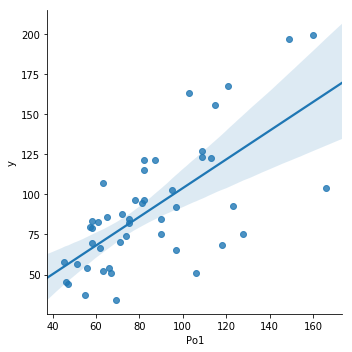

In [40]:
sns.lmplot(x = 'Po1', y = 'y', data = data)

##### 1.4. Calculando ahora el Criterio de Información Bayesiana para los submodelos de una covariable.

In [41]:
for feature in X.columns.values:
    x = X[feature]
    model = sm.OLS(y, sm.add_constant(x)).fit()
    print('BIC_'+feature+': '+str(np.round(model.bic,2)))

AIC_M: 483.28
AIC_So: 483.27
AIC_Ed: 478.49
AIC_Po1: 453.57
AIC_LF: 481.95
AIC_M.F: 481.46
AIC_Pop: 477.98
AIC_U1: 483.54
AIC_U2: 482.16
AIC_GDP: 473.48


##### 1.5. Para hacer la reducción al mejor submodelo hay múltiples formas de hacerlo. Pese a no ser la mejor manera, por la sencillez de su aplicación en este caso se aplicará una selección exhaustiva y un backward stepwise de entre los 1023 submodelos posibles con ayuda de la librería mlxtend. Se considerará la varianza explicada por el modelo como métrica de selección, ya que no se puede considerar otras medidas más confiables como el AIC o el BIC.

In [45]:
#Instalamos la librería mlxtend ya que no viene por defecto en Anaconda.
import sys
!conda config --add channels conda-forge
!conda install --yes --prefix {sys.prefix} mlxtend
#Importamos el regresor lineal de scikit-learn pues mlxtend no es compatible con statsmodels.
from sklearn.linear_model      import LinearRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as efs #Exhaustivo.
from mlxtend.feature_selection import SequentialFeatureSelector as sfs #Stepwise.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs: 
    - mlxtend


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.3.9           |           py36_0         149 KB  conda-forge
    mlxtend-0.13.0             |             py_1         1.2 MB  conda-forge
    openssl-1.0.2r             |       hfa6e2cd_0         5.4 MB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         184 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.9 MB

The following NEW packages will be INSTALLED:

    mlxtend:         0.13.0-py_1       conda-forge

The following packages will be UPDATED:

    ca-certificates: 2019.1.23-0       anaconda    --> 2019.3.9-hecc5488_0 conda-forge
    certifi:         2019.3.9-py3



==> WARNING: A newer version of conda exists. <==
  current version: 4.4.10
  latest version: 4.6.8

Please update conda by running

    $ conda update -n base conda



certifi 2019.3.9:            |   0% 
certifi 2019.3.9: #######5   |  75% 
certifi 2019.3.9: #########8 |  99% 
certifi 2019.3.9: ########## | 100% 

mlxtend 0.13.0:            |   0% 
mlxtend 0.13.0:            |   1% 
mlxtend 0.13.0: #5         |  16% 
mlxtend 0.13.0: ##4        |  25% 
mlxtend 0.13.0: #####1     |  51% 
mlxtend 0.13.0: #######5   |  75% 
mlxtend 0.13.0: ########2  |  82% 
mlxtend 0.13.0: ########7  |  88% 
mlxtend 0.13.0: #########1 |  91% 
mlxtend 0.13.0: #########4 |  94% 
mlxtend 0.13.0: #########6 |  97% 
mlxtend 0.13.0: #########8 |  99% 
mlxtend 0.13.0: ########## | 100% 

openssl 1.0.2r:            |   0% 
openssl 1.0.2r: 1          |   2% 
openssl 1.0.2r: 6          |   7% 
openssl 1.0.2r: 9          |  10% 
openssl 1.0.2r: #1         |  11% 
openssl 1.0.2r: ##         |  20% 
openssl 1.0.2r

In [146]:
lm = LinearRegression(fit_intercept = True) #Construcción del objeto regressión.
efs1 = efs(lm, max_features = 10, scoring='explained_variance', cv=5) #cv es un parámetro de cross-validation
efs1 = efs1.fit(X, y) #Performance del modelo

Features: 1023/1023

In [147]:
print('Mejor varianza explicada: %.4f' % efs1.best_score_)
print('Índices de las covariables:', efs1.best_idx_)
print('Nombres de las covariables:', efs1.best_feature_names_)

Best accuracy score: 0.4846
Best subset (indices): (0, 2, 3, 7, 8)
Best subset (corresponding names): ('M', 'Ed', 'Po1', 'U1', 'U2')


In [151]:
#Para aplicar stepwise es necesario transformar la data de entrada a formato de numpy.
X = X.to_numpy()
y = y.values

In [168]:
#Se pide un modelo parsimonioso, que sea backward (del modelo saturado va extrayendo las menos significativas)
sfs1 = sfs(lm, k_features = 'parsimonious', forward=False, cv=5, floating = False, verbose = 2, scoring = 'explained_variance')
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2019-03-17 21:20:32] Features: 9/1 -- score: 0.36541344980988033[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2019-03-17 21:20:32] Features: 8/1 -- score: 0.4080114417925155[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2019-03-17 21:20:32] Features: 7/1 -- score: 0.4564687487657607[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2019-03-17 21:20:32] Features: 6/1 -- score: 0.4786352711699092[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0

In [171]:
print('Covariables seleccionadas: ', sfs1.k_feature_names_)
print('Varianza explicada: %.2f' %sfs1.k_score_)

Covariables seleccionadas:  ('0', '3')
Varianza explicada: 0.45


# Logistic regression

2.- Con los datos de creditos, obtenga el performance del modelo. Obtenga el error de entrenamiento y de prueba, con una muestra de entrenamiento training_sample=60,70,80,90.

In [174]:
from sklearn.preprocessing   import LabelEncoder #Transforma datos categóricos a numéricos.
from sklearn.linear_model    import LogisticRegression #Clase de Regresión Logística.
from sklearn.model_selection import train_test_split #Separa la muestra en train y test.

In [175]:
cred = pd.read_csv('incumplimiento.csv', index_col = 0)
cred['Estudiante'] = LabelEncoder().fit_transform(cred['Estudiante']) 
cred['Incumplimiento'] = LabelEncoder().fit_transform(cred['Incumplimiento'])
cred

,Incumplimiento,Estudiante,Saldo,Ingreso
Folio,,,,
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879
6,0,1,919.588530,7491.558572
7,0,0,825.513331,24905.226578
8,0,1,808.667504,17600.451344
9,0,0,1161.057854,37468.529288


Segmentamos la población en buenos y morosos, haciendo una gráfica de dispersión de las dos variables continuas que tenemos: saldo e ingreso.

In [198]:
a = cred[(cred.Incumplimiento == 1) & (cred.Estudiante == 1)] #Estudiantes cumplidos.
b = cred[(cred.Incumplimiento == 0) & (cred.Estudiante == 1)] #Estudiantes deudores.
c = cred[(cred.Incumplimiento == 1) & (cred.Estudiante == 0)] #No estudiantes cumplidos
d = cred[(cred.Incumplimiento == 0) & (cred.Estudiante == 0)] #No estudiantes deudores.

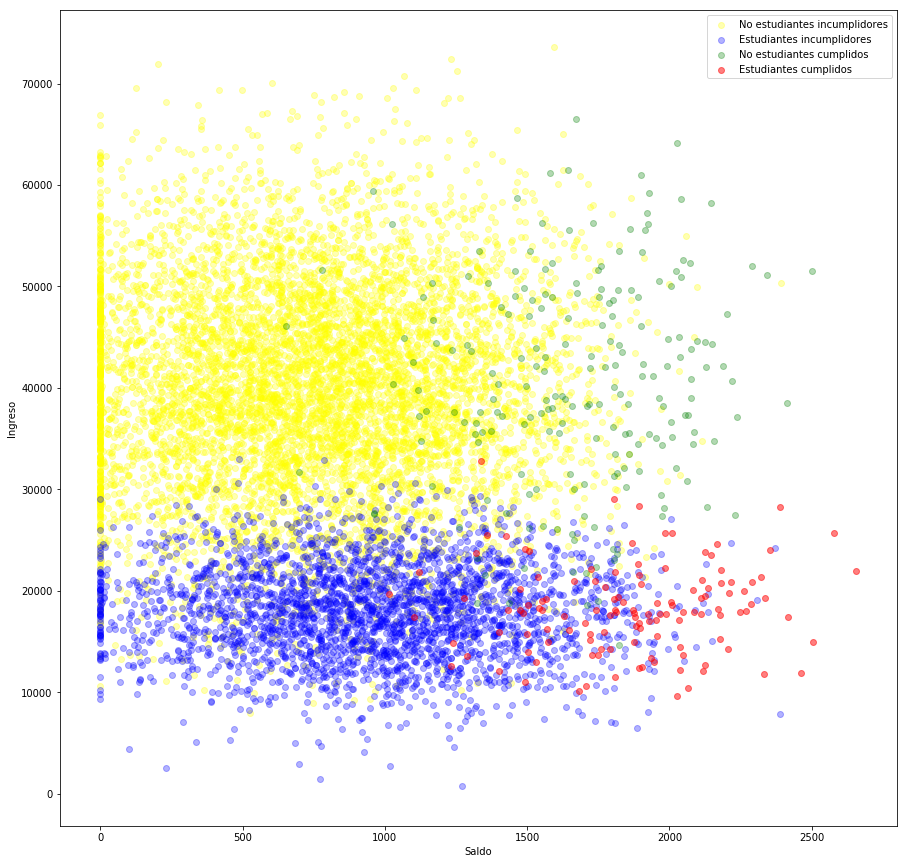

In [208]:
plt.figure(figsize = (15,15))
plt.xlabel('Saldo')
plt.ylabel('Ingreso')
plt.scatter(d.Saldo,d.Ingreso,color='yellow',alpha=0.3)
plt.scatter(b.Saldo,b.Ingreso,color='blue',alpha=0.3)
plt.scatter(c.Saldo,c.Ingreso,color='green',alpha=0.3)
plt.scatter(a.Saldo,a.Ingreso,color='red',label='',alpha=0.5)
plt.legend(labels = ['No estudiantes incumplidores', 'Estudiantes incumplidores', 'No estudiantes cumplidos', 'Estudiantes cumplidos'])

Gracias a la gráfica de dispersión, ya que el objetivo es determinar a quién se le ofrece un crédito, la variable Saldo muestra mayor varianza en este sentido. Si observa el eje de ingreso, este queda solo dividido por la situación escolar (Estudiante o No Estudiante), lo que no mejora nuestra estimación.

In [217]:
X_log_sat = cred.drop('Incumplimiento', axis = 1)
X_log_sal = cred.drop(['Incumplimiento', 'Ingreso', 'Estudiante'], axis = 1)
y_log = cred.Incumplimiento

In [244]:
for ts in (0.6, 0.7, 0.8, 0.9):
    X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log_sat, y_log, train_size = ts, random_state = 42)
    model_log = LogisticRegression(C = 1, solver = 'newton-cg', max_iter = 1000).fit(X_train_log, y_train_log)
    print('\n Modelo saturado con '+str(int(ts*100))+'% de la muestra \t')
    print('Coeficients: ', model_log.coef_[0])
    print('Intercept: ', model_log.intercept_[0])
    print('Train error: ', 100*(1-model_log.score(X_train_log, y_train_log)))
    print('Test error: ', 100*(1-model_log.score(X_test_log, y_test_log)))
    X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log_sal, y_log, train_size = ts, random_state = 42)
    model2 = LogisticRegression(C = 1, solver = 'newton-cg', max_iter = 1000).fit(X_train_log, y_train_log)
    print('Modelo solo con la covariable Saldo con '+str(int(ts*100))+'% de la muestra')
    print('Coeficient: ', model2.coef_[0])
    print('Intercept: ', model2.intercept_[0])
    e1 = model2.predict(X_train_log) == y_train_log
    error = model2.predict(X_test_log) == y_test_log
    print('Train error: %.2f' % (100*(len(e1)-e1.sum())/len(e1))+"%")
    print('Test error: %.2f' % (100*(len(error)-error.sum())/len(error))+"%\t")


 Modelo saturado con 60% de la muestra 	
Coeficients:  [-6.75938164e-01  6.06958022e-03 -3.70673732e-06]
Intercept:  -11.218639392880094
Train error:  2.5666666666666615
Test error:  2.7750000000000052
Modelo solo con la covariable Saldo con 60% de la muestra
Coeficient:  [0.00586998]
Intercept:  -11.290022751823455
Train error: 2.68%
Test error: 2.98%	

 Modelo saturado con 70% de la muestra 	
Coeficients:  [-4.67532138e-01  5.78847921e-03  5.82025353e-06]
Intercept:  -11.107873762274968
Train error:  2.657142857142858
Test error:  2.6666666666666616
Modelo solo con la covariable Saldo con 70% de la muestra
Coeficient:  [0.00559087]
Intercept:  -10.80024250562973
Train error: 2.79%
Test error: 2.73%	

 Modelo saturado con 80% de la muestra 	
Coeficients:  [-4.54310713e-01  5.87276970e-03  8.13976203e-06]
Intercept:  -11.345466749576476
Train error:  2.5499999999999967
Test error:  3.049999999999997
Modelo solo con la covariable Saldo con 80% de la muestra
Coeficient:  [0.00564783]
In

De lo anterior se puede confirmar que la variable Saldo es más explicativa para decidir dar o no créditos, y la información que proporcionan las otras dos covariables (Ingreso, Estudiante) incrementa muy poco la precisión del modelo, por lo que la diferencia en precisión de ambos modelos es despreciable y se considerará un modelo de una sola covariable que resulte parsimonioso.

In [245]:
model_log = LogisticRegression(C = 1, solver = 'newton-cg', max_iter = 1000).fit(X_log_sal, y_log)

In [246]:
X_t = np.linspace(cred.Saldo.min(),cred.Saldo.max(),10000).reshape(-1,1)
yp = model_log.predict(X_t)
yprob = model_log.predict_proba(X_t)

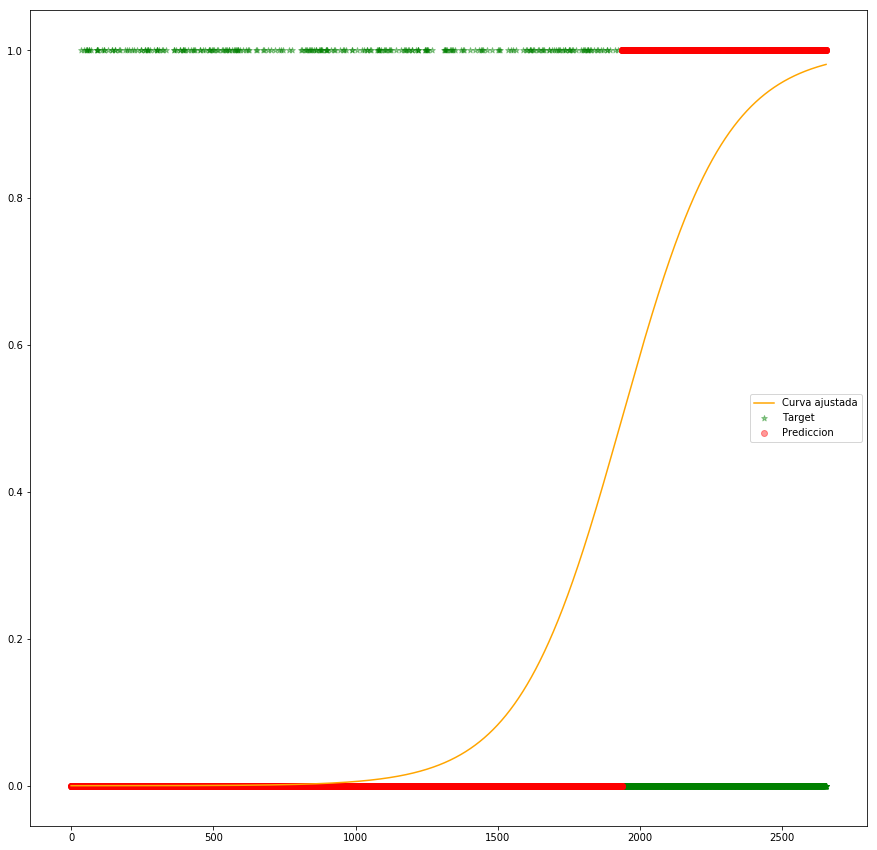

In [249]:
plt.figure(figsize=(15,15))
plt.scatter(X_t,y_log,color=['green'],label='Target',marker='*',alpha=0.4)
plt.scatter(X_t,yp,color='red',label='Predicción',marker='o',alpha=0.4)
plt.plot(X_t,yprob[:,1],color='orange', label='Curva ajustada')
plt.legend()

5.- Con mismos datos halle el mejor modelo usando:
1. Validacion cruzada, 10-kfolds cross validation.
2. Leave-one-out cross-validation

In [254]:
#Selección exhaustiva del mejor modelo usando 10-fold cross-validation
logr = LogisticRegression(C = 1, solver = 'newton-cg', max_iter = 1000)
efs2 = efs(logr, min_features = 1, max_features = 3, scoring='accuracy', cv=10) #cv es un parámetro de cross-validation
efs2 = efs2.fit(X_log_sat, y_log) #Performance del modelo

Features: 7/7

In [256]:
print('Accuracy: %.4f' % efs2.best_score_)
print('Índices de las covariables:', efs2.best_idx_)
print('Nombres de las covariables:', efs2.best_feature_names_)

Accuracy: 0.9736
Índices de las covariables: (1, 2)
Nombres de las covariables: ('Saldo', 'Ingreso')


Al intentar aplicar la selección con un leave-one-out cross-validation la máquina no soportó el número de operaciones. Por ello se consideró el modelo arrojado anteriormente como el mejor, además que en realidad son muy pocos submodelos y perfectamente podemos confiar en el que arrojó al hacer el 10-fold cross-validation.